In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [191]:
dataframe = pd.read_csv("petrol_consumption.csv")
dataframe.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [192]:
dataframe.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


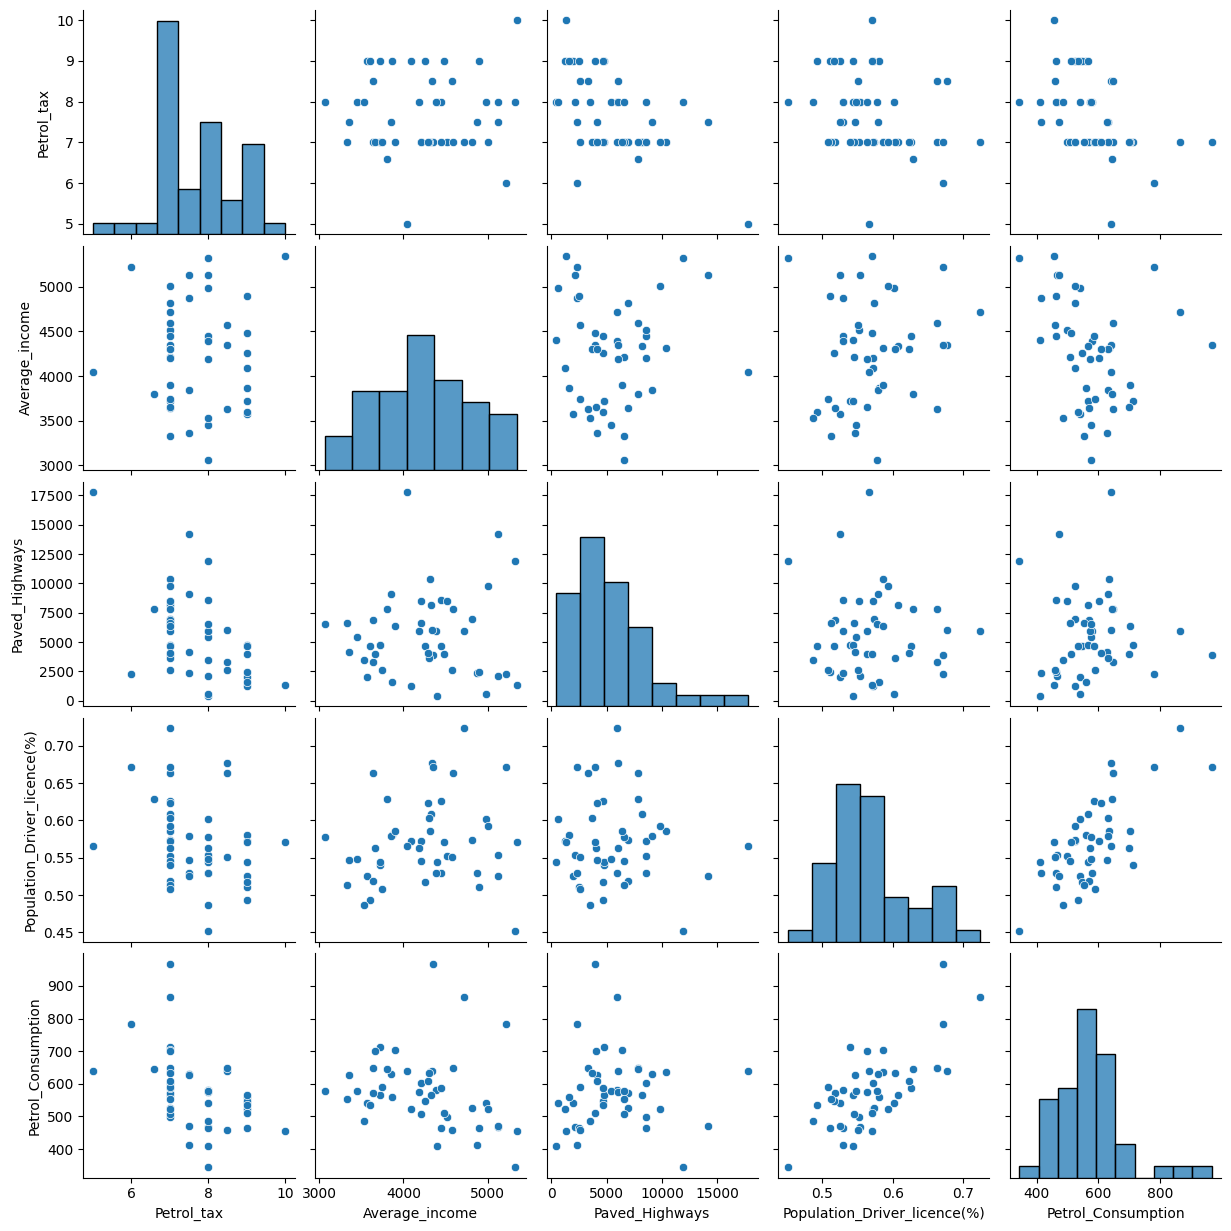

In [193]:
sb.pairplot(dataframe)

In [194]:
correlation = dataframe.corr()
correlation

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot: >

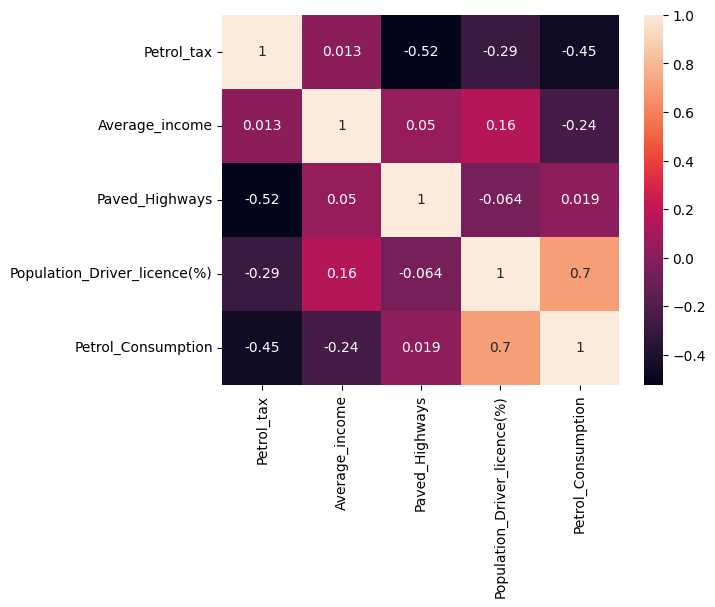

In [195]:
sb.heatmap(correlation, annot=True)

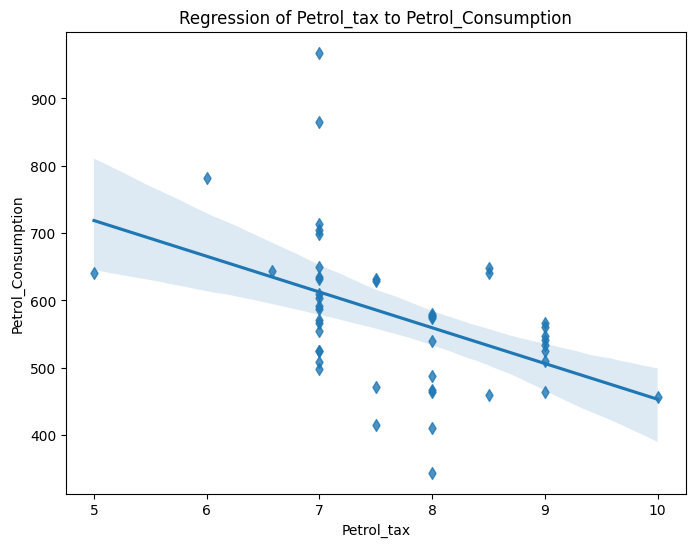

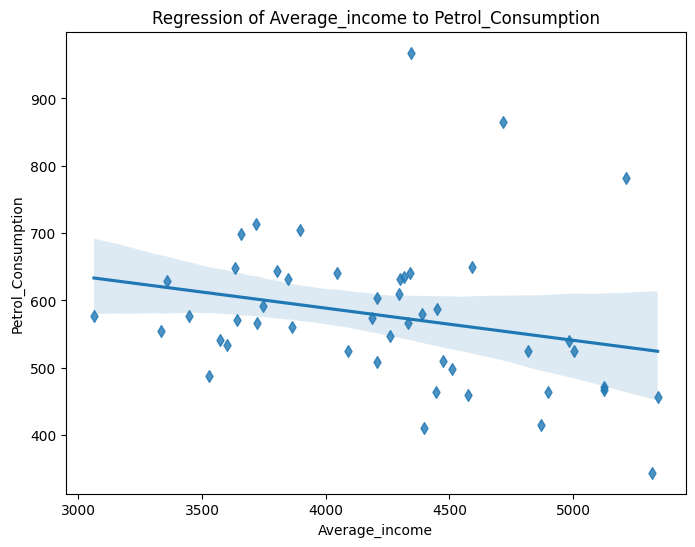

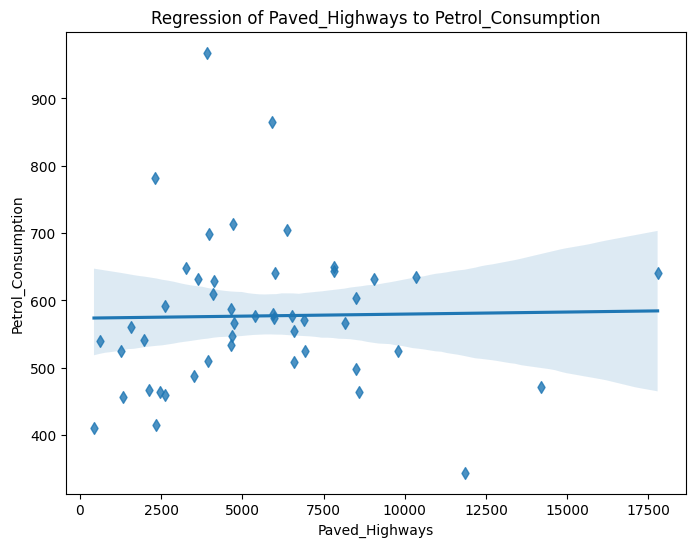

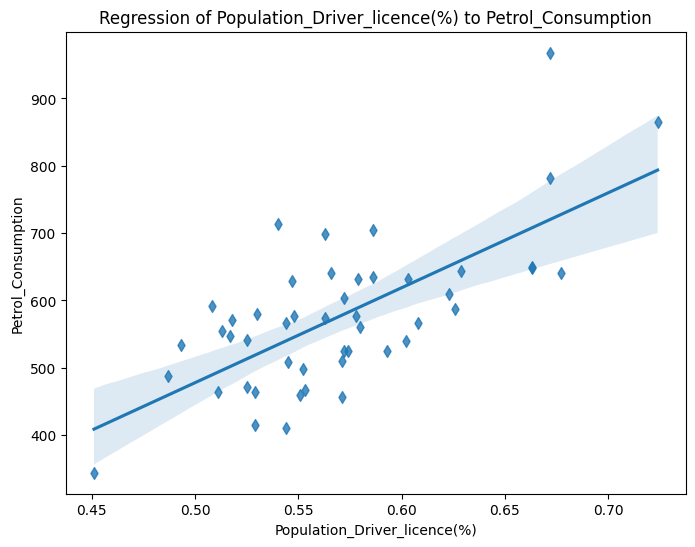

In [196]:
variables = ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y="Petrol_Consumption", data=dataframe, marker = "d").set(title=f"Regression of {var} to Petrol_Consumption")

In [197]:
X = dataframe[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]]
y = dataframe["Petrol_Consumption"]

In [198]:
X.shape

(48, 4)

In [199]:
SEED = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [200]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [201]:
print(f"Beta_0: {LinReg.intercept_}, Beta_n: {LinReg.coef_}")

Beta_0: 344.58590039674596, Beta_n: [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


In [202]:
print(f"train_score: {LinReg.score(X_train, y_train)}")
print(f"test_score: {LinReg.score(X_test, y_test)}")

train_score: 0.6895815278628233
test_score: 0.42818683491379905


In [203]:
y_pred = LinReg.predict(X_test)
compare = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
compare

,y_test,y_pred
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [204]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 58.48
Mean squared error: 3983.85
Root mean squared error: 63.12


In [205]:
kf =KFold(n_splits=5, shuffle=True, random_state=16)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {train_index}, Test set:{test_index}')
    cnt += 1

Fold:1, Train set: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 24 26 27 28
 29 30 31 32 36 37 40 41 42 43 44 45 46 47], Test set:[ 3 20 21 23 25 33 34 35 38 39]
Fold:2, Train set: [ 0  1  2  3  4  5  8  9 10 12 13 14 16 18 19 20 21 23 25 28 29 30 31 32
 33 34 35 37 38 39 40 41 42 43 44 45 46 47], Test set:[ 6  7 11 15 17 22 24 26 27 36]
Fold:3, Train set: [ 1  3  4  5  6  7 10 11 13 14 15 16 17 18 20 21 22 23 24 25 26 27 29 30
 31 32 33 34 35 36 38 39 40 41 42 43 44 46], Test set:[ 0  2  8  9 12 19 28 37 45 47]
Fold:4, Train set: [ 0  1  2  3  4  5  6  7  8  9 11 12 15 16 17 19 20 21 22 23 24 25 26 27
 28 31 32 33 34 35 36 37 38 39 41 43 45 46 47], Test set:[10 13 14 18 29 30 40 42 44]
Fold:5, Train set: [ 0  2  3  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 33 34 35 36 37 38 39 40 42 44 45 47], Test set:[ 1  4  5 16 31 32 41 43 46]


In [206]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [207]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-8622.13204394 -3608.81669373 -1860.38782746 -4582.19345564
 -4023.74012154]
rmse= 67.38


**5 splits (rmse = 74.87) 10 splits (rmse = 73.09) 16 splits (rmse = 69.71) with random state 48**

**5 splits (rmse = 67.38) 10 splits (rmse = 69.16) 16 splits (rmse = 69.38) with random state 16**

**Once again, the K-Fold methode was used because of its simplicity. After a bunch of tests we got the best outcome with 5 splits and random state equal to 16. The K-Fold is fast to adjust and to expiremnt with, seeing lots of outcomes and going for the best one.**